In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Step 1: Load the CSV file
df = pd.read_csv('bank.csv' ) 
print("# Data Loaded Successfully!\n")

# Data Loaded Successfully!



In [10]:
print(" Preview of Dataset:")
print(df.head(11))

 Preview of Dataset:
    age         job   marital  education default  balance housing loan  \
0    59      admin.   married  secondary      no     2343     yes   no   
1    56      admin.   married  secondary      no       45      no   no   
2    41  technician   married  secondary      no     1270     yes   no   
3    55    services   married  secondary      no     2476     yes   no   
4    54      admin.   married   tertiary      no      184      no   no   
5    42  management    single   tertiary      no        0     yes  yes   
6    56  management   married   tertiary      no      830     yes  yes   
7    60     retired  divorced  secondary      no      545     yes   no   
8    37  technician   married  secondary      no        1     yes   no   
9    28    services    single  secondary      no     5090     yes   no   
10   38      admin.    single  secondary      no      100     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome deposit  
0   unknown


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1166
           1       0.76      0.80      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233

🔍 Confusion Matrix:
[[898 268]
 [211 856]]
🎯 Accuracy Score: 0.7854903716972682


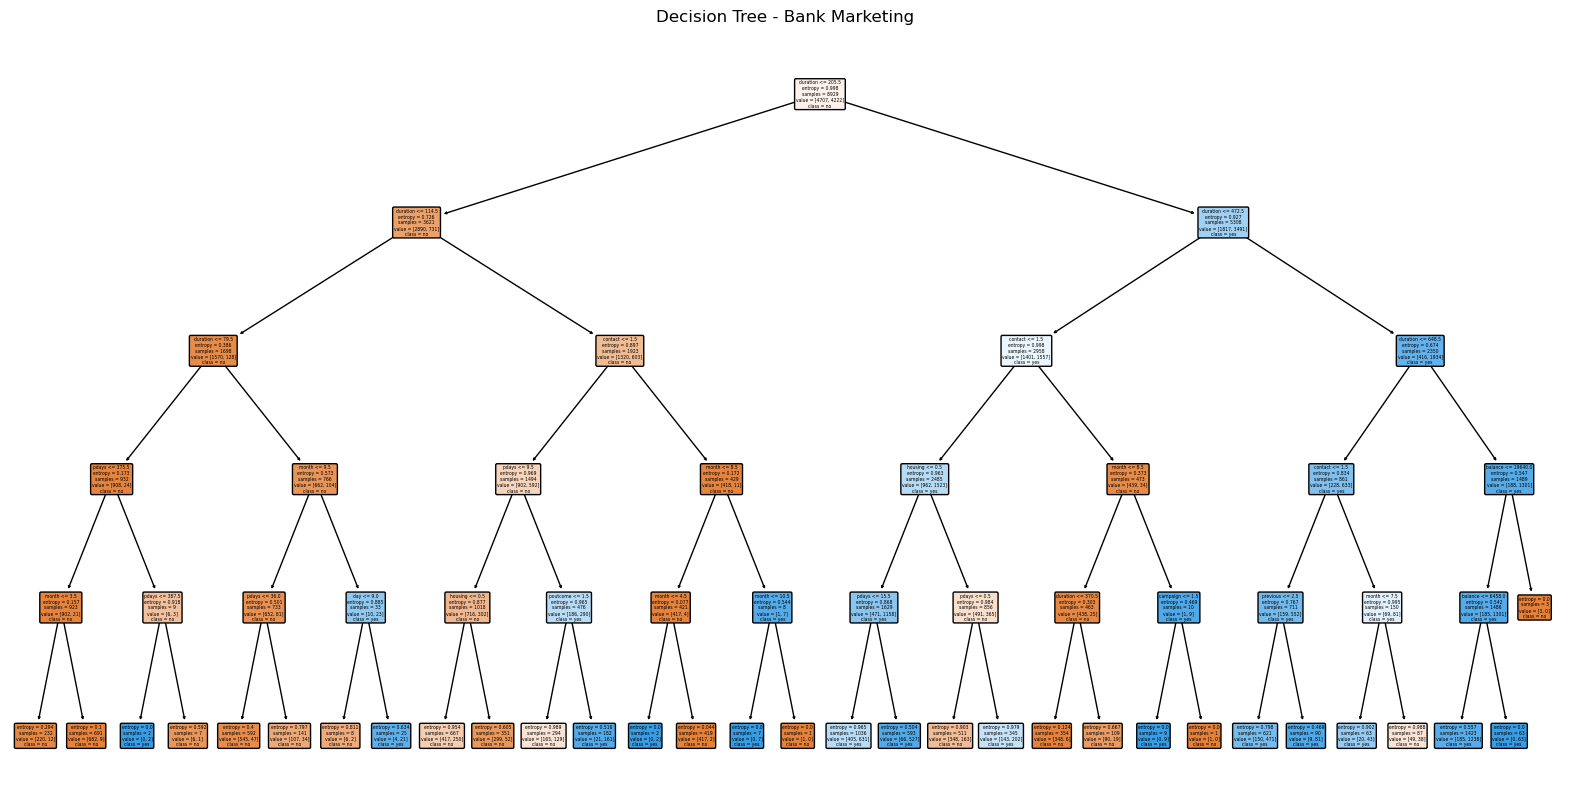

In [12]:




# Step 2: Encode Categorical Variables
df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le

# Step 3: Feature & Target Separation
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Prediction
y_pred = clf.predict(X_test)

# Step 7: Evaluation
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("🎯 Accuracy Score:", accuracy_score(y_test, y_pred))

# Step 8: Visualize the Tree
# Step 8: Visualize the Tree
plt.figure(figsize=(20,10))
plot_tree(
    clf,
    feature_names=list(X.columns),
    class_names=list(label_encoders['deposit'].classes_),
    filled=True,
    rounded=True
)
plt.title("Decision Tree - Bank Marketing")
plt.show()

